# IMPORTS

In [1]:
!pip install matplotlib==3.7.3
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install opencv-python
!pip install glob
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
import cv2

#Pour faire une liste des chemins d'accès
from glob import glob
from tqdm import tqdm

import numpy as np

#Pour traiter les "labels"
from tensorflow.keras.utils import to_categorical

#Pour séparer les images de test et les images d'entrainement
from sklearn.model_selection import train_test_split

In [6]:
print(f"Matplotlib version: {plt.matplotlib.__version__}")


Matplotlib version: 3.7.3


# TEST DES BIBLIOTHEQUES

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.


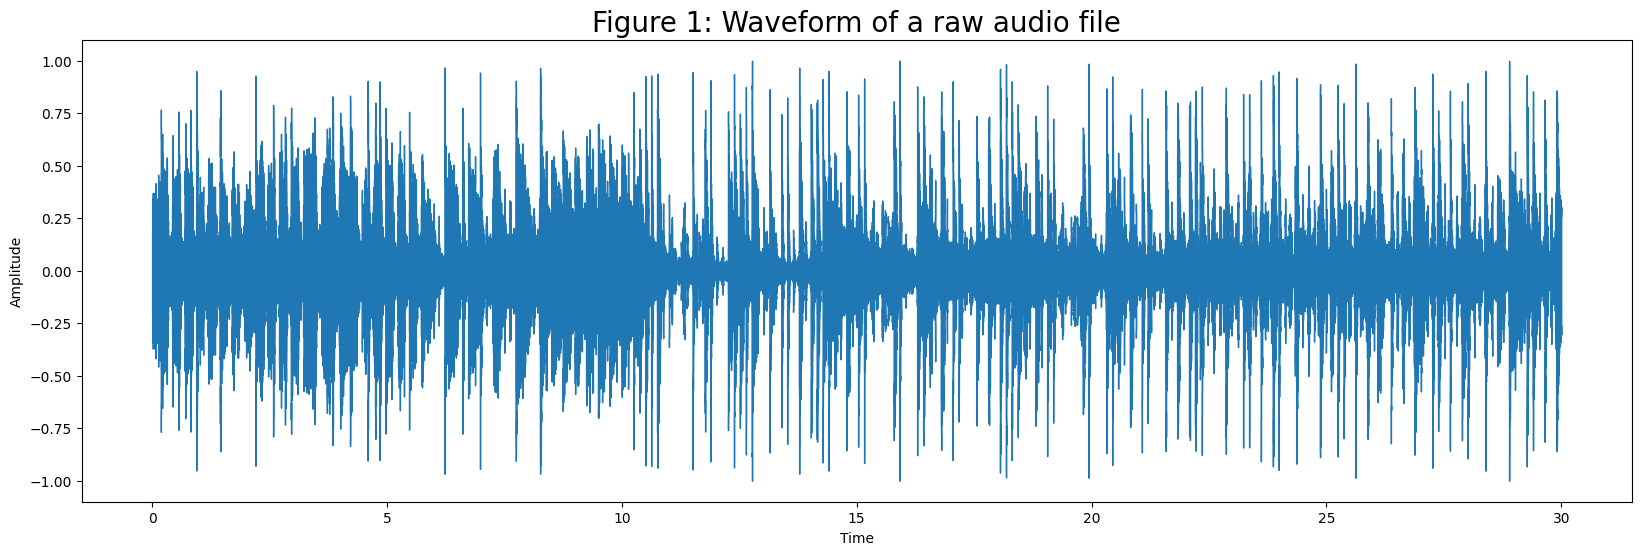

In [7]:
## Extracting the first song in the Hip Hop folder 

##### Step 1. Import the song file
print("This song is 30 seconds long.")
file_path = './Data/genres_original/hiphop/hiphop.00000.wav'

## Load an audio file as a floating point time series.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

## Plot the waveform of the loaded file
plt.figure(figsize=(20, 6))
plt.title("Figure 1: Waveform of a raw audio file",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
librosa.display.waveshow(x, sr=sampling_rate)



# RECUP DES DONNEES
# X ET Y

In [8]:
All_data =glob("./Data/images_original/*/*.png")

print(All_data)

X=[]
Y=[]
genres = []

taille=288

for adresse in tqdm(All_data):
    image=cv2.imread(adresse)
    #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(taille,taille))
    alpha = 3 # Contrast control (1.0-3.0)
    beta = 60 # Brightness control (0-100)

    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    X.append(image)
    genre = adresse.split('/')[2].split('\\')[1]
    genres.append(genre)

for val in genres :
    if val == 'blues' :
        Y.append(0)
    if val == 'classical' :
        Y.append(1)
    if val == 'country' :
        Y.append(2)
    if val == 'disco' :
        Y.append(3)
    if val == 'hiphop' :
        Y.append(4)
    if val == 'jazz' :
        Y.append(5)
    if val == 'metal' :
        Y.append(6)
    if val == 'pop' :
        Y.append(7)
    if val == 'reggae' :
        Y.append(8)
    if val == 'rock' :
        Y.append(9)


['./Data/images_original\\blues\\blues00000.png', './Data/images_original\\blues\\blues00001.png', './Data/images_original\\blues\\blues00002.png', './Data/images_original\\blues\\blues00003.png', './Data/images_original\\blues\\blues00004.png', './Data/images_original\\blues\\blues00005.png', './Data/images_original\\blues\\blues00006.png', './Data/images_original\\blues\\blues00007.png', './Data/images_original\\blues\\blues00008.png', './Data/images_original\\blues\\blues00009.png', './Data/images_original\\blues\\blues00010.png', './Data/images_original\\blues\\blues00011.png', './Data/images_original\\blues\\blues00012.png', './Data/images_original\\blues\\blues00013.png', './Data/images_original\\blues\\blues00014.png', './Data/images_original\\blues\\blues00015.png', './Data/images_original\\blues\\blues00016.png', './Data/images_original\\blues\\blues00017.png', './Data/images_original\\blues\\blues00018.png', './Data/images_original\\blues\\blues00019.png', './Data/images_orig

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:06<00:00, 152.58it/s]


In [9]:
print(Y[0])

0


In [10]:
X=np.array(X)


# On commence par calibrer les nombres en entrées 
# ("d'un intervalle de 0 à 255, on passe à un intervalle de 0 à 1")
X=X.astype("float32")
X/=255

# On modifie le format des tenseurs "x"
# pour qu'il puisse "matcher avec l'entrée du réseau de neurones"
# A TESTEEEEER EN NIVEAUX DE GRIS
X=np.reshape(X,(X.shape[0],taille,taille,3))


# On transforme les labels en vecteurs de probabilités
# pour qu'il puissent "matcher avec la sortie du réseau de neurones"
Y=to_categorical(Y,10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(799, 288, 288, 3)
(799, 10)
(200, 288, 288, 3)
(200, 10)


# PREPARATION DU MODELE (RESEAU DE NEURONES)

Notre super réseau de neurones

(pas du tout copié-collé voyons)

In [11]:
# On importe un modèle de réseau de neurones avec une couche à la suite et des
# neurones connectés aux couches précédentes et suivantes
from keras.models import Sequential

# On importe les différentes sortes de couches qu'on utilisera
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU

from tensorflow.keras.optimizers import Adam

model=Sequential()

#On en rajoute une couche
# A CHANGER
# NB COUCHES 
# model.add(nomCouche(A changer, kernel_size=(aChanger,aChanger),activation="relu",input_shape=(taille,taille,3)))))

model.add(Conv2D(128,kernel_size=(4,4),activation="LeakyReLU",input_shape=(taille,taille,3)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.6))

#On en rajoute une couche
model.add(Conv2D(128,kernel_size=(4,4),activation="LeakyReLU"))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.6))

#On en rajoute une couche
model.add(Conv2D(64,kernel_size=(3,3),activation="LeakyReLU"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.6))
#On en rajoute une couche
model.add(Conv2D(32,kernel_size=(3,3),activation="LeakyReLU"))
model.add(MaxPool2D(pool_size=(2,2)))


#On va passer le tout dans un réseau de neurone standard
model.add(Flatten())

model.add(Dense(64,activation="ReLU"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="ReLU"))
#On passe à la sortie
# NE PAS CHANGER CELLE LA
model.add(Dense(10, activation="softmax"))

#Pour voir un résumé du modèle :
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 285, 285, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2  (None, 95, 95, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 95, 95, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 128)       262272    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)      

# ENTRAINEMENT YOUHOU

In [12]:
model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics="accuracy")

model.fit(X_train,Y_train,batch_size=16,epochs=1,verbose=1,validation_data=(X_test,Y_test))



50/50 [==============================] - 57s 1s/step - loss: 2.3338 - accuracy: 0.1151 - val_loss: 2.3028 - val_accuracy: 0.0750


In [13]:
# Evaluate a model using data and expected predictions
def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1]*100))
    print("Model error rate : %.2f%%" % (100-scores[1]*100))
# Evaluate the model v3 
print_model_error_rate(model, X_test, Y_test)

Model score : 7.50%
Model error rate : 92.50%


# SAUVEGARDE

In [14]:
import h5py

model.save("Ynote_classification_vFAKE20.keras")

# RESULTATS DU SET DE TEST

7/7 [==============================] - 3s 461ms/step


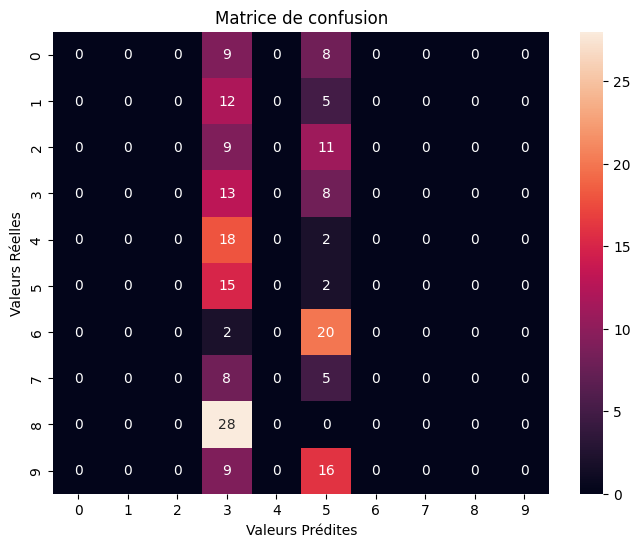

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd

Y_pred=model.predict(X_test)
y_test=np.argmax(Y_test,axis=1)
y_pred=np.argmax(Y_pred,axis=1)
matrix_confusion = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(matrix_confusion,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Matrice de confusion')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Valeurs Prédites')
plt.show()

# PROGRAMME DE TEST

In [5]:
from keras.models import load_model
import numpy as np
import cv2
#Pour afficher les images

predicteur=load_model("./Ynote_classification_GOOD.keras")
taille=288

This song is 30 seconds long.
['./tests\\Bobby McFerrin - Dont Worry Be Happy (Official Music Video).mp3', './tests\\CINDY LAUPER  - GIRLS JUST WANT TO HAVE FUN - LYRICS.mp3', './tests\\Earth, Wind & Fire - September (Official HD Video).mp3', './tests\\Femme libérée.mp3', './tests\\Indochine - Laventurier (Clip officiel).mp3', './tests\\Kool & The Gang - Celebration.mp3', './tests\\La Isla Bonita.mp3', './tests\\Les Rita Mitsouko - Marcia Baïla (Clip Officiel).mp3', './tests\\Les sunlights des tropiques.mp3', './tests\\Mecano - Hijo de la Luna (Videoclip).mp3', './tests\\Michael Jackson - Bad (lyrics).mp3', './tests\\Partenaire Particulier.mp3', './tests\\Queen - Another One Bites the Dust (Official Video).mp3', './tests\\Rick Astley - Never Gonna Give You Up (Official Music Video).mp3', './tests\\Soldat Louis - Du rhum des femmes (officiel).mp3', './tests\\Stevie Wonder - Part Time Lover (Lyrics).mp3', './tests\\Sting - Englishman In New York.mp3', './tests\\Wham! - Wake Me Up Before 

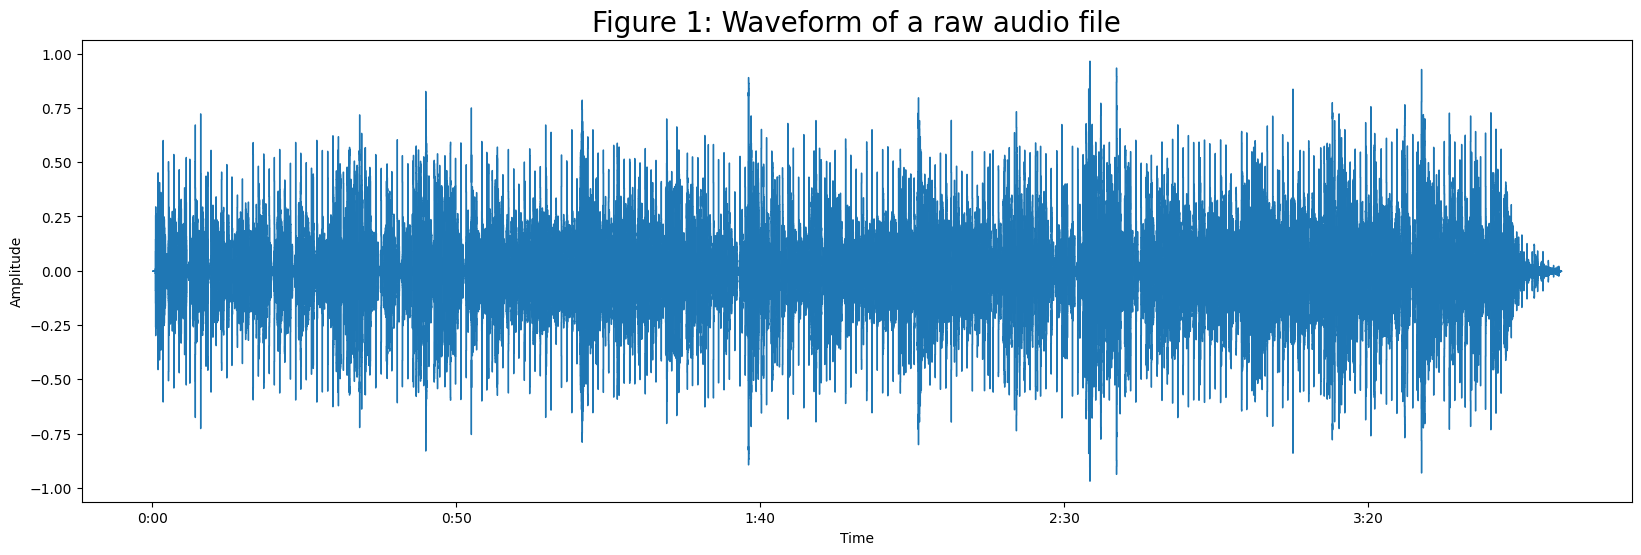

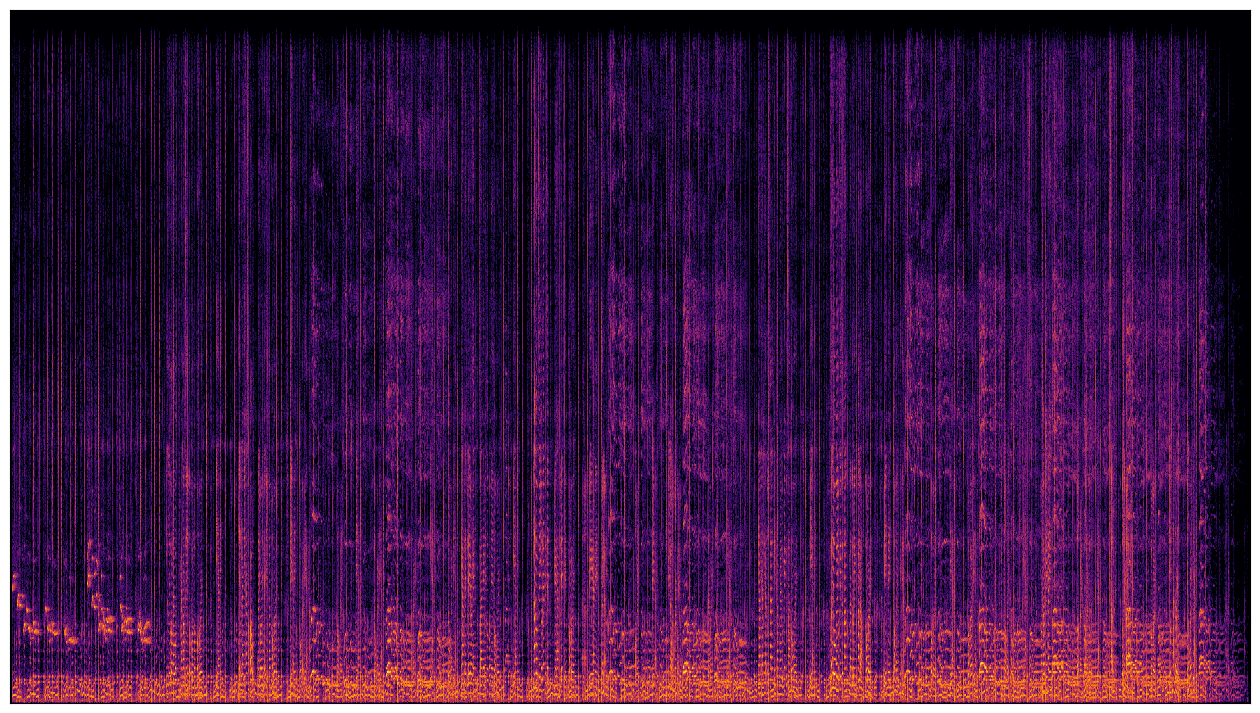

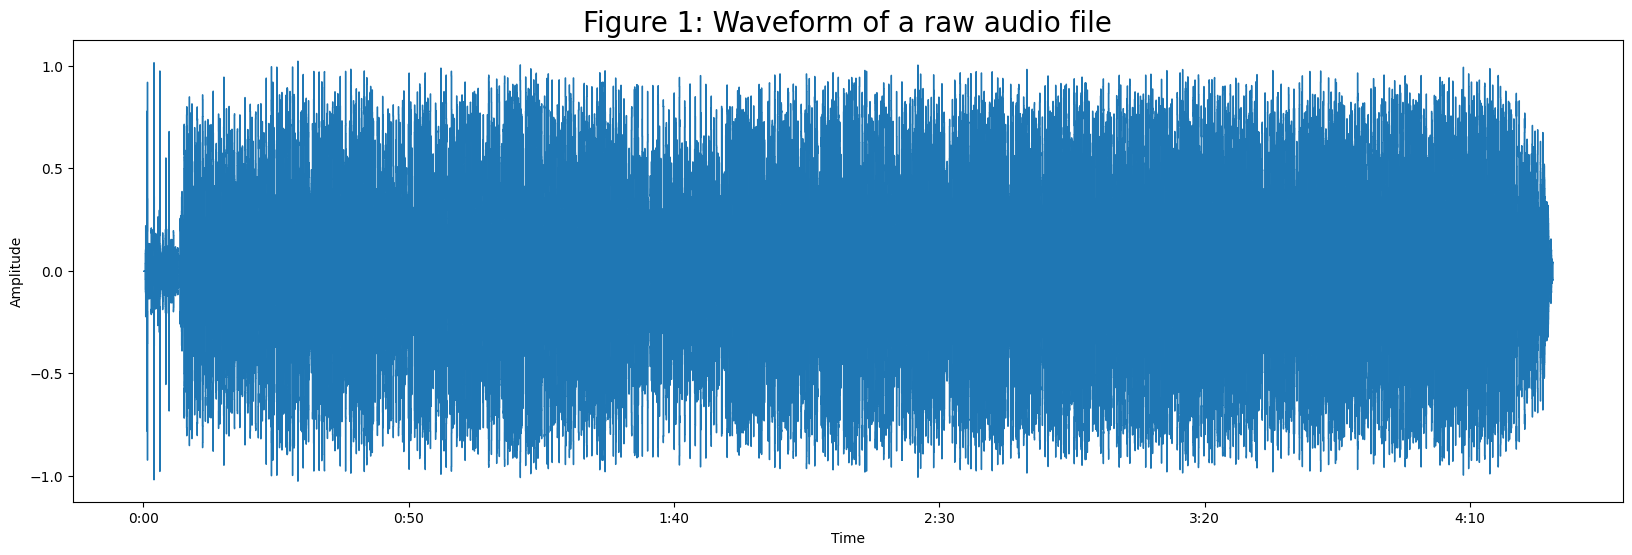

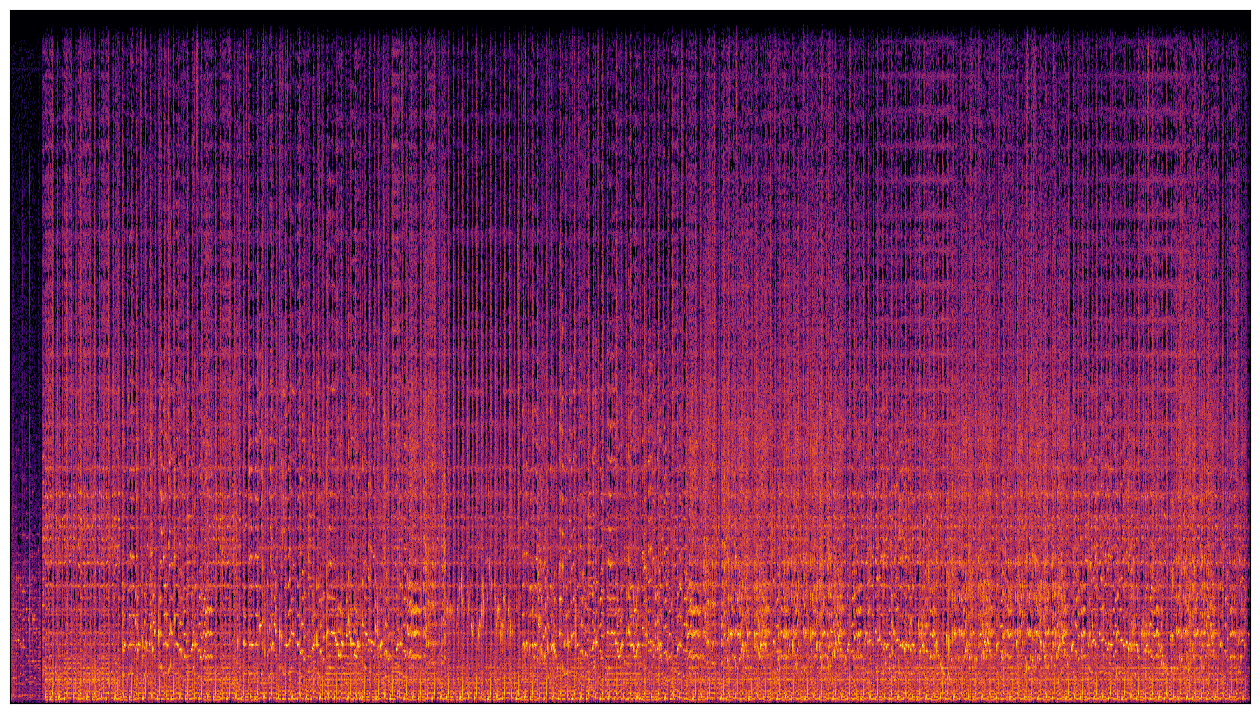

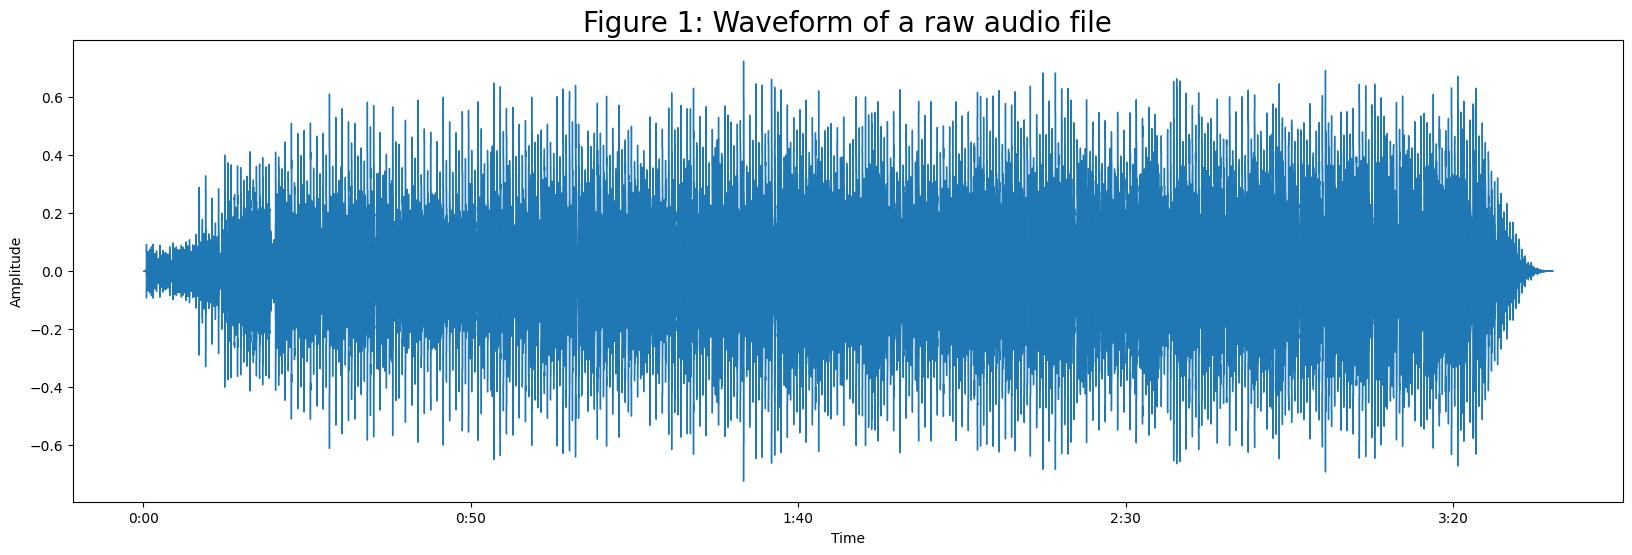

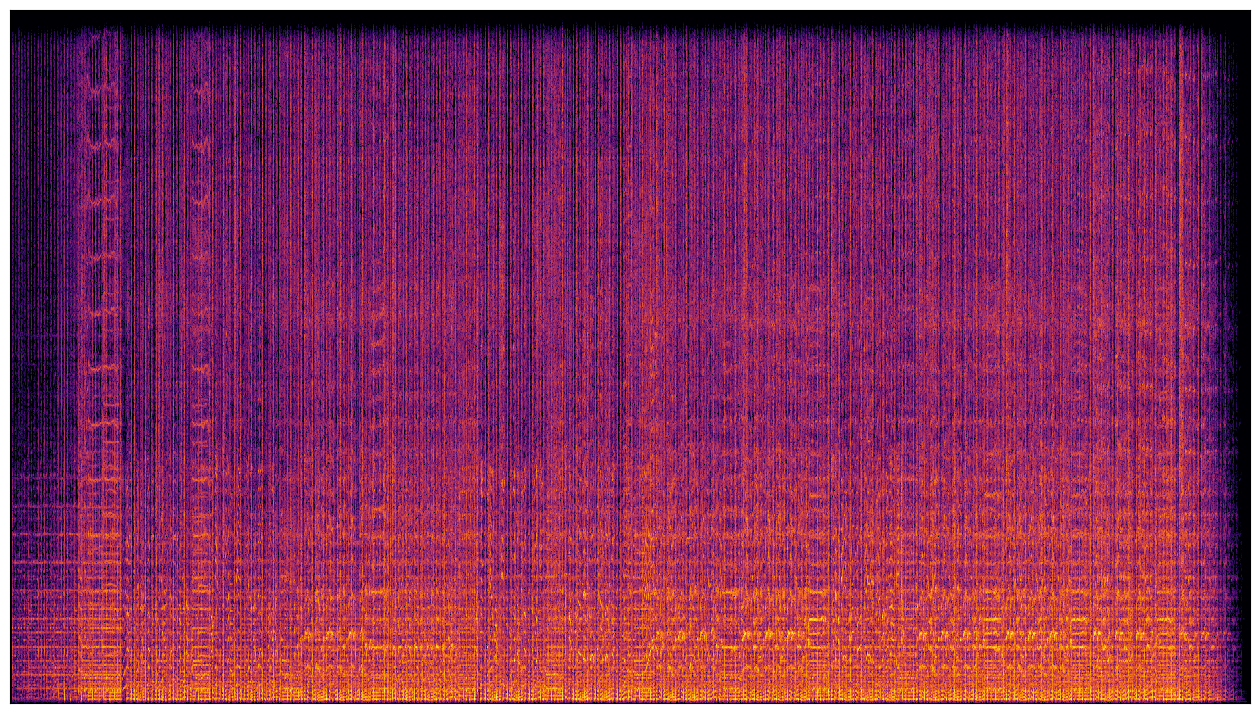

In [17]:

## Extracting the first song in the Hip Hop folder 

##### Step 1. Import the song file
print("This song is 30 seconds long.")

paths = glob("./tests/*.mp3")

print(paths)

i = 0

for path in paths : 
    file_path = path

    ## Load an audio file as a floating point time series.
    x , sampling_rate = librosa.load(file_path)


    print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
          "per second the audio is sampled.")
    print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
    print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

    ## Plot the waveform of the loaded file
    plt.figure(figsize=(20, 6))
    plt.title("Figure 1: Waveform of a raw audio file",fontdict={'fontsize':20})
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    librosa.display.waveshow(x, sr=sampling_rate)

    ##### Apply Short-Time Fourier Transform (STFT) to Decompose Wave Form to base frequencies

    ## This function converts our file into a time-frequency domain representation using short-time Fourier transform 
    ## (essentially this is the change of FFT's over time)
    wav_form = librosa.stft(x)
    S_spectogram, phase_spectogram = librosa.magphase(librosa.stft(y=x))

    ## Plot the spectrogram of the STFT representation
    wav_form_db = librosa.amplitude_to_db(abs(wav_form))
    plt.figure(figsize=(16,9))
    #plt.title("Figure 3: Spectrographic representation of the waveform from fig 1.",fontdict={'fontsize':20})
    #plt.xlabel("Time(s)")
    #plt.ylabel("Frequency(Hz)")
    #librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
    librosa.display.specshow(wav_form_db, sr=sampling_rate)
    #plt.colorbar()
    plt.inferno()


    plt.savefig(f'test{i}.png')
    i += 1
    if i > 2 :
        break


In [18]:
print('oui')

oui


In [20]:
from IPython.display import Image

nbtest = glob("./test*.png")
print(nbtest)
i=0
for test in nbtest :
    
    ImageAPredire=cv2.imread(f"test{i}.png")
    print(ImageAPredire.shape)

    ImageAPredire=ImageAPredire[:,80:561]

    ImageAPredire=cv2.resize(ImageAPredire,(taille,taille))
    #cv2_imshow(ImageAPredire)

    ImageAPredire=np.array(ImageAPredire)
    ImageAPredire=ImageAPredire.astype("float32")

    ImageAPredire=ImageAPredire/255

    ImageAPredire=np.reshape(ImageAPredire,(1,taille,taille,3))
    alpha = 3 # Contrast control (1.0-3.0)
    beta = 60 # Brightness control (0-100)

    ImageAPredire = cv2.convertScaleAbs(ImageAPredire, alpha=alpha, beta=beta)

    prediction=predicteur.predict(ImageAPredire)

    signe=np.argmax(prediction)

    if signe == 0 :
        print("Blues")
    if signe == 1 :
        print("classical")
    if signe == 2 :
        print("country")
    if signe == 3 :
        print("disco")
    if signe == 4 :
        print("hiphop")
    if signe == 5 :
        print("jazz")
    if signe == 6 :
        print("metal")
    if signe == 7 :
        print("pop")
    if signe == 8 :
        print("reggae")
    if signe == 9 :
        print("rock")
    i += 1


['.\\test0.png', '.\\test1.png', '.\\test2.png']
(900, 1600, 3)
1/1 [==============================] - 0s 49ms/step
hiphop
(900, 1600, 3)
1/1 [==============================] - 0s 47ms/step
pop
(900, 1600, 3)
1/1 [==============================] - 0s 31ms/step
pop


In [26]:
import pandas as pd
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Chemin vers le fichier CSV
csv_file = "df_musiques_recommandations.csv"

# Liste des chemins vers les fichiers audio
paths = glob.glob("./Data/genres_original/reggae/*.wav")

# Création d'un DataFrame vide avec les colonnes spécifiées
df_reco = pd.DataFrame(columns=["Nom", "Blues", "Classical", "Country", "Disco", "HipHop",
                                 "Jazz", "Metal", "Pop", "Reggae", "Rock", "ChoixMax"])

# Fonction pour charger et traiter les fichiers audio un par un
def process_audio(path):
    # Lecture du fichier audio
    x, sampling_rate = librosa.load(path)

    # Traitement de l'image
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sampling_rate)
    plt.savefig('test.png')

    # Prédiction du genre musical
    ImageAPredire = cv2.imread("test.png")
    ImageAPredire = ImageAPredire[:, 80:561]
    ImageAPredire = cv2.resize(ImageAPredire, (taille, taille))
    ImageAPredire = np.array(ImageAPredire).astype("float32") / 255
    ImageAPredire = np.reshape(ImageAPredire, (1, taille, taille, 3))
    prediction = predicteur.predict(ImageAPredire)
    signe = np.argmax(prediction)

    # Mapping des indices de prédiction aux noms de genres
    genres = ["Blues", "Classical", "Country", "Disco", "HipHop",
              "Jazz", "Metal", "Pop", "Reggae", "Rock"]
    choix_max = genres[signe]

    # Retourner les résultats sous forme de dictionnaire
    return {
        "Nom": path,
        "Blues": prediction[0][0],
        "Classical": prediction[0][1],
        "Country": prediction[0][2],
        "Disco": prediction[0][3],
        "HipHop": prediction[0][4],
        "Jazz": prediction[0][5],
        "Metal": prediction[0][6],
        "Pop": prediction[0][7],
        "Reggae": prediction[0][8],
        "Rock": prediction[0][9],
        "ChoixMax": choix_max
    }

# Traitement de chaque fichier audio avec tqdm
for path in tqdm(paths, desc="Traitement des fichiers audio"):
    # Traitement du fichier audio
    row = process_audio(path)
    
    # Ajout de la ligne au DataFrame existant
    df_reco = df_reco.append(row, ignore_index=True)

    # Libération de la mémoire
    plt.close()
    
# Enregistrement du DataFrame en tant que fichier CSV
df_reco.to_csv(csv_file, index=False)

Traitement des fichiers audio:   0%|                                                           | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 127ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   1%|▌                                                  | 1/100 [00:01<03:11,  1.94s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   2%|█                                                  | 2/100 [00:03<02:53,  1.77s/it]

1/1 [==============================] - 0s 149ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   3%|█▌                                                 | 3/100 [00:05<02:45,  1.71s/it]

1/1 [==============================] - 0s 110ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   4%|██                                                 | 4/100 [00:06<02:42,  1.69s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   5%|██▌                                                | 5/100 [00:08<02:47,  1.76s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   6%|███                                                | 6/100 [00:17<06:12,  3.97s/it]

1/1 [==============================] - 0s 107ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   7%|███▌                                               | 7/100 [00:18<05:04,  3.27s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   8%|████                                               | 8/100 [00:20<04:14,  2.76s/it]

1/1 [==============================] - 0s 103ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:   9%|████▌                                              | 9/100 [00:22<03:46,  2.49s/it]

1/1 [==============================] - 0s 117ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  10%|█████                                             | 10/100 [00:24<03:21,  2.24s/it]

1/1 [==============================] - 0s 123ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  11%|█████▌                                            | 11/100 [00:25<03:03,  2.06s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  12%|██████                                            | 12/100 [00:27<02:49,  1.93s/it]

1/1 [==============================] - 0s 124ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  13%|██████▌                                           | 13/100 [00:29<02:40,  1.85s/it]

1/1 [==============================] - 0s 103ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  14%|███████                                           | 14/100 [00:30<02:37,  1.83s/it]

1/1 [==============================] - 0s 111ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  15%|███████▌                                          | 15/100 [00:32<02:32,  1.80s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  16%|████████                                          | 16/100 [00:34<02:34,  1.84s/it]

1/1 [==============================] - 0s 122ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  17%|████████▌                                         | 17/100 [00:36<02:40,  1.93s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  18%|█████████                                         | 18/100 [00:38<02:36,  1.91s/it]

1/1 [==============================] - 0s 110ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  19%|█████████▌                                        | 19/100 [00:40<02:32,  1.88s/it]

1/1 [==============================] - 0s 117ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  20%|██████████                                        | 20/100 [00:42<02:32,  1.90s/it]

1/1 [==============================] - 0s 113ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  21%|██████████▌                                       | 21/100 [00:44<02:29,  1.90s/it]

1/1 [==============================] - 0s 121ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  22%|███████████                                       | 22/100 [00:46<02:33,  1.97s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  23%|███████████▌                                      | 23/100 [00:48<02:34,  2.01s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  24%|████████████                                      | 24/100 [00:50<02:26,  1.93s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  25%|████████████▌                                     | 25/100 [00:51<02:22,  1.89s/it]

1/1 [==============================] - 0s 140ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  26%|█████████████                                     | 26/100 [00:53<02:18,  1.87s/it]

1/1 [==============================] - 0s 123ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  27%|█████████████▌                                    | 27/100 [00:55<02:16,  1.87s/it]

1/1 [==============================] - 0s 128ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  28%|██████████████                                    | 28/100 [00:57<02:12,  1.84s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  29%|██████████████▍                                   | 29/100 [00:59<02:08,  1.80s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  30%|███████████████                                   | 30/100 [01:00<02:07,  1.82s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  31%|███████████████▌                                  | 31/100 [01:02<02:02,  1.77s/it]

1/1 [==============================] - 0s 108ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  32%|████████████████                                  | 32/100 [01:04<01:58,  1.74s/it]

1/1 [==============================] - 0s 119ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  33%|████████████████▌                                 | 33/100 [01:05<01:52,  1.68s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  34%|█████████████████                                 | 34/100 [01:07<01:51,  1.69s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  35%|█████████████████▌                                | 35/100 [01:09<01:50,  1.70s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  36%|██████████████████                                | 36/100 [01:10<01:47,  1.68s/it]

1/1 [==============================] - 0s 109ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  37%|██████████████████▌                               | 37/100 [01:12<01:44,  1.65s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  38%|███████████████████                               | 38/100 [01:14<01:44,  1.68s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  39%|███████████████████▌                              | 39/100 [01:15<01:40,  1.64s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  40%|████████████████████                              | 40/100 [01:17<01:39,  1.66s/it]

1/1 [==============================] - 0s 118ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  41%|████████████████████▌                             | 41/100 [01:19<01:37,  1.65s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  42%|█████████████████████                             | 42/100 [01:20<01:39,  1.71s/it]

1/1 [==============================] - 0s 157ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  43%|█████████████████████▌                            | 43/100 [01:22<01:38,  1.73s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  44%|██████████████████████                            | 44/100 [01:24<01:39,  1.78s/it]

1/1 [==============================] - 0s 124ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  45%|██████████████████████▌                           | 45/100 [01:26<01:42,  1.87s/it]

1/1 [==============================] - 0s 127ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  46%|███████████████████████                           | 46/100 [01:28<01:40,  1.86s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  47%|███████████████████████▌                          | 47/100 [01:30<01:40,  1.89s/it]

1/1 [==============================] - 0s 119ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  48%|████████████████████████                          | 48/100 [01:32<01:38,  1.89s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  49%|████████████████████████▌                         | 49/100 [01:34<01:38,  1.93s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  50%|█████████████████████████                         | 50/100 [01:36<01:37,  1.96s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  51%|█████████████████████████▌                        | 51/100 [01:38<01:36,  1.96s/it]

1/1 [==============================] - 0s 127ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  52%|██████████████████████████                        | 52/100 [01:40<01:32,  1.94s/it]

1/1 [==============================] - 0s 122ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  53%|██████████████████████████▌                       | 53/100 [01:42<01:34,  2.01s/it]

1/1 [==============================] - 0s 112ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  54%|███████████████████████████                       | 54/100 [01:44<01:28,  1.92s/it]

1/1 [==============================] - 0s 123ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  55%|███████████████████████████▌                      | 55/100 [01:45<01:23,  1.85s/it]

1/1 [==============================] - 0s 142ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  56%|████████████████████████████                      | 56/100 [01:47<01:22,  1.87s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  57%|████████████████████████████▍                     | 57/100 [01:49<01:17,  1.81s/it]

1/1 [==============================] - 0s 140ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  58%|████████████████████████████▉                     | 58/100 [01:51<01:16,  1.82s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  59%|█████████████████████████████▌                    | 59/100 [01:53<01:16,  1.86s/it]

1/1 [==============================] - 0s 118ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  60%|██████████████████████████████                    | 60/100 [01:55<01:14,  1.87s/it]

1/1 [==============================] - 0s 118ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  61%|██████████████████████████████▌                   | 61/100 [01:56<01:10,  1.82s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  62%|███████████████████████████████                   | 62/100 [01:59<01:12,  1.92s/it]

1/1 [==============================] - 0s 118ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  63%|███████████████████████████████▌                  | 63/100 [02:00<01:08,  1.86s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  64%|████████████████████████████████                  | 64/100 [02:02<01:06,  1.84s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  65%|████████████████████████████████▌                 | 65/100 [02:04<01:10,  2.00s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  66%|█████████████████████████████████                 | 66/100 [02:07<01:12,  2.12s/it]

1/1 [==============================] - 0s 120ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  67%|█████████████████████████████████▌                | 67/100 [02:09<01:08,  2.07s/it]

1/1 [==============================] - 0s 133ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  68%|██████████████████████████████████                | 68/100 [02:11<01:05,  2.04s/it]

1/1 [==============================] - 0s 139ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  69%|██████████████████████████████████▌               | 69/100 [02:12<01:00,  1.94s/it]

1/1 [==============================] - 0s 149ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  70%|███████████████████████████████████               | 70/100 [02:14<00:57,  1.93s/it]

1/1 [==============================] - 0s 133ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  71%|███████████████████████████████████▌              | 71/100 [02:16<00:55,  1.91s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  72%|████████████████████████████████████              | 72/100 [02:18<00:54,  1.94s/it]

1/1 [==============================] - 0s 133ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  73%|████████████████████████████████████▌             | 73/100 [02:20<00:52,  1.95s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  74%|█████████████████████████████████████             | 74/100 [02:22<00:52,  2.01s/it]

1/1 [==============================] - 0s 114ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  75%|█████████████████████████████████████▌            | 75/100 [02:25<00:51,  2.06s/it]

1/1 [==============================] - 0s 111ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  76%|██████████████████████████████████████            | 76/100 [02:27<00:49,  2.06s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  77%|██████████████████████████████████████▌           | 77/100 [02:29<00:47,  2.09s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  78%|███████████████████████████████████████           | 78/100 [02:31<00:45,  2.05s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  79%|███████████████████████████████████████▌          | 79/100 [02:33<00:43,  2.05s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  80%|████████████████████████████████████████          | 80/100 [02:34<00:38,  1.92s/it]

1/1 [==============================] - 0s 126ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  81%|████████████████████████████████████████▌         | 81/100 [02:37<00:38,  2.01s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  82%|█████████████████████████████████████████         | 82/100 [02:39<00:36,  2.02s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  83%|█████████████████████████████████████████▌        | 83/100 [02:41<00:34,  2.03s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  84%|██████████████████████████████████████████        | 84/100 [02:42<00:30,  1.93s/it]

1/1 [==============================] - 0s 122ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  85%|██████████████████████████████████████████▌       | 85/100 [02:44<00:28,  1.91s/it]

1/1 [==============================] - 0s 102ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  86%|███████████████████████████████████████████       | 86/100 [02:46<00:26,  1.91s/it]

1/1 [==============================] - 0s 130ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  87%|███████████████████████████████████████████▌      | 87/100 [02:48<00:25,  1.97s/it]

1/1 [==============================] - 0s 113ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  88%|████████████████████████████████████████████      | 88/100 [02:50<00:24,  2.01s/it]

1/1 [==============================] - 0s 123ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  89%|████████████████████████████████████████████▌     | 89/100 [02:52<00:21,  1.95s/it]

1/1 [==============================] - 0s 147ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  90%|█████████████████████████████████████████████     | 90/100 [02:54<00:20,  2.01s/it]

1/1 [==============================] - 0s 141ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  91%|█████████████████████████████████████████████▌    | 91/100 [02:57<00:20,  2.24s/it]

1/1 [==============================] - 0s 110ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  92%|██████████████████████████████████████████████    | 92/100 [02:59<00:16,  2.09s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  93%|██████████████████████████████████████████████▌   | 93/100 [03:01<00:14,  2.06s/it]

1/1 [==============================] - 0s 139ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  94%|███████████████████████████████████████████████   | 94/100 [03:03<00:11,  1.99s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  95%|███████████████████████████████████████████████▌  | 95/100 [03:05<00:09,  1.99s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  96%|████████████████████████████████████████████████  | 96/100 [03:07<00:08,  2.01s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  97%|████████████████████████████████████████████████▌ | 97/100 [03:09<00:06,  2.01s/it]

1/1 [==============================] - 0s 133ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  98%|█████████████████████████████████████████████████ | 98/100 [03:11<00:03,  1.94s/it]

1/1 [==============================] - 0s 125ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio:  99%|█████████████████████████████████████████████████▌| 99/100 [03:13<00:01,  1.98s/it]

1/1 [==============================] - 0s 134ms/step


C:\Users\Maure\AppData\Local\Temp\ipykernel_24440\4201792952.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reco = df_reco.append(row, ignore_index=True)
Traitement des fichiers audio: 100%|█████████████████████████████████████████████████| 100/100 [03:15<00:00,  1.95s/it]


In [22]:

# Enregistrement du DataFrame en tant que fichier CSV
df_reco.to_csv(csv_file, index=False)